In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np


from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn import metrics, tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from IPython.display import Image
import pydotplus

In [5]:
emp_data = pd.read_csv(r"D:\DSML\4. Data Visualization\Why are employees leaving.csv")
X = emp_data.drop(columns = ['left','Division','salary','ID'])
y = emp_data['left']
y.unique()

array([1, 0], dtype=int64)

In [7]:
pd.set_option('display.max_columns', None)

emp_one_hot_encoded_data = pd.get_dummies(emp_data, columns = ['Division','salary'])
emp_one_hot_encoded_data[1:5]

,ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Division_IT,Division_RandD,Division_accounting,Division_hr,Division_management,Division_marketing,Division_product_mng,Division_sales,Division_support,Division_technical,salary_high,salary_low,salary_medium
1,2,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,False,True,False,False,False,False,True
2,3,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,False,True,False,False,False,False,True
3,4,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,False,True,False,False,False,True,False
4,5,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,False,True,False,False,False,True,False


In [13]:
emp_data_prepared  = emp_one_hot_encoded_data.drop(columns =['ID','left'])
X = emp_data_prepared
y = emp_data['left']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state= 15)
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(x_train, y_train)
clf.score(x_train,y_train)

y_pred = clf.predict(x_test)

#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[2252,   39],
       [  20,  689]], dtype=int64)

In [15]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print(precision) 

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print(recall)

0.9464285714285714
0.9717912552891397


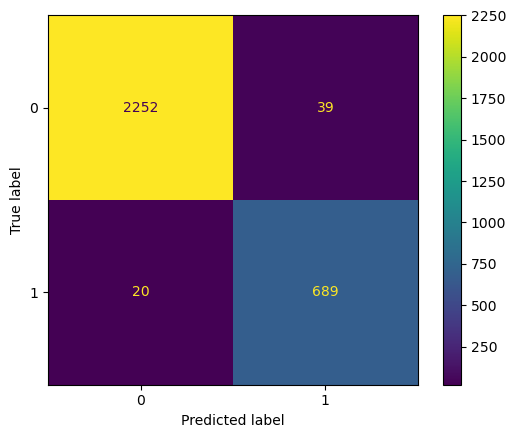

|--- satisfaction_level <= 0.47
|   |--- satisfaction_level <= 0.11
|   |   |--- class: 1
|   |--- satisfaction_level >  0.11
|   |   |--- number_project <= 2.50
|   |   |   |--- last_evaluation <= 0.57
|   |   |   |   |--- average_montly_hours <= 162.00
|   |   |   |   |   |--- average_montly_hours <= 125.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- average_montly_hours >  125.50
|   |   |   |   |   |   |--- last_evaluation <= 0.44
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- last_evaluation >  0.44
|   |   |   |   |   |   |   |--- satisfaction_level <= 0.31
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- satisfaction_level >  0.31
|   |   |   |   |   |   |   |   |--- salary_high <= 0.50
|   |   |   |   |   |   |   |   |   |--- Division_sales <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- Division_sales >  0.50
|   |   |   |   |   |   |   |   |   |   |-

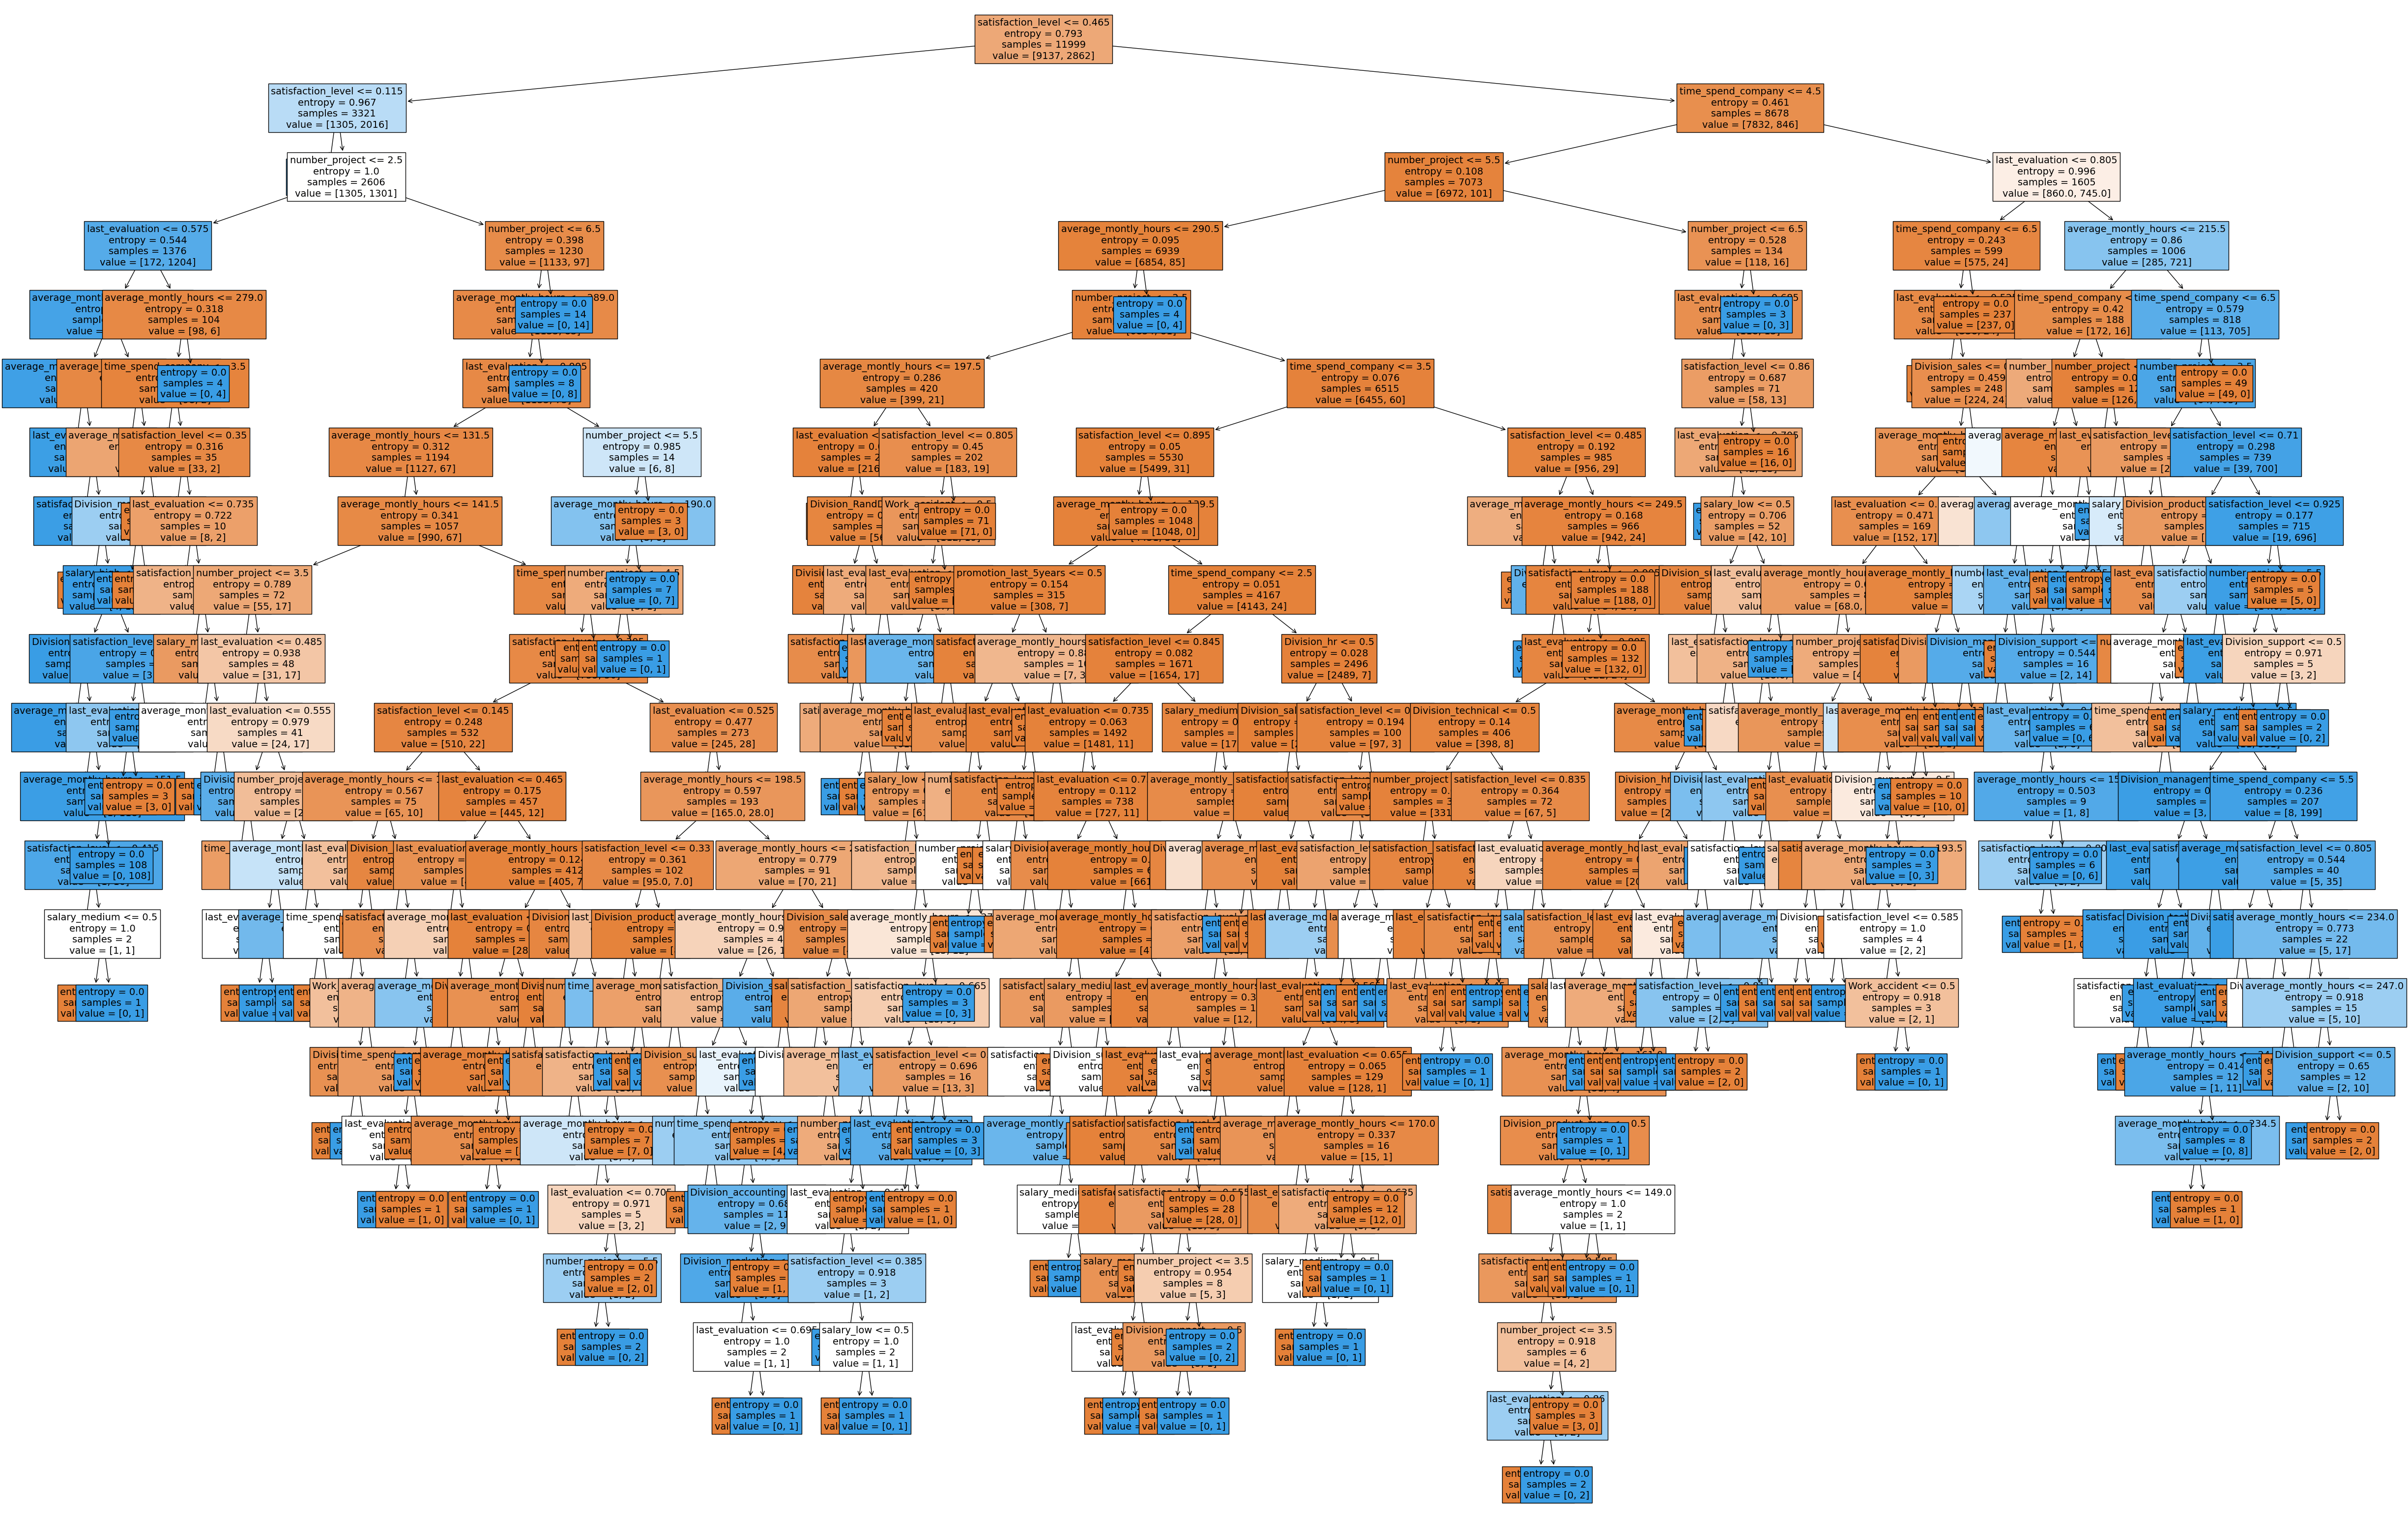

In [19]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,  display_labels=clf.classes_)
disp.plot()
plt.show()

fig = plt.figure(figsize = (60,40))

tree.plot_tree(clf,feature_names=X.columns.to_list(),filled = True,fontsize = 14)
plt.plot()
text_representation = tree.export_text(clf, feature_names=X.columns.to_list())
print(text_representation)


In [20]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators= 50, criterion= "gini")
rf_clf.fit(x_train, y_train )
rf_y_pred = rf_clf.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, rf_y_pred)
confusion_matrix

array([[2286,    5],
       [  23,  686]], dtype=int64)

>1 0.762 (0.000)
>2 0.877 (0.012)
>3 0.914 (0.005)
>4 0.918 (0.004)
>5 0.923 (0.009)
>6 0.963 (0.007)
>7 0.973 (0.003)
>None 0.992 (0.002)


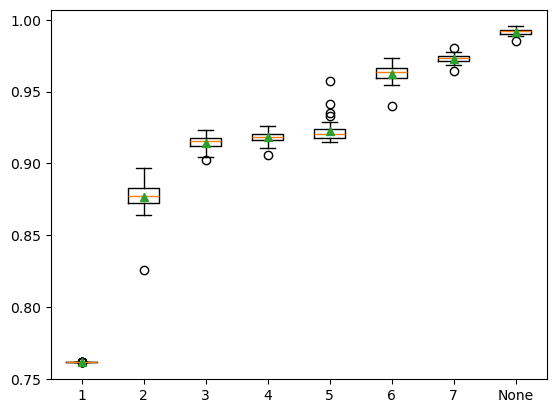

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std

# get a list of models to evaluate
def get_models1():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 20,30, 50]
	for n in n_trees:
		models[str(n)] = RandomForestClassifier(n_estimators=n)
	return models

def get_models2():
	models = dict()
	# consider tree depths from 1 to 7 and None=full
	depths = [i for i in range(1,8)] + [None]
	for n in depths:
		models[str(n)] = RandomForestClassifier(max_depth=n)
	return models


# get a list of models to evaluate
def get_models3():
	models = dict()
	# explore number of features from 1 to 7
	for i in range(1,10):
		models[str(i)] = RandomForestClassifier(max_features=i)
	return models



# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores



# get the models to evaluate
models = get_models2()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [23]:
# Ada Boost 
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=30, learning_rate=0.4)
ada_clf.fit(x_train, y_train)
ada_y_pred = ada_clf.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, ada_y_pred)
confusion_matrix

C:\Users\SENAPATHI\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


array([[2233,   58],
       [ 176,  533]], dtype=int64)